# Detektory i Deskryptory

# Cezary Polak 165516
# Jakub Mańkowski 172466
## Laboratorium nr 1

In [2]:
import matplotlib.pyplot as plt
import skimage.feature
from skimage.feature import hog, greycomatrix, greycoprops
from skimage import data, exposure, color
from skimage.io import imshow, imread
import cv2
import numpy as np
from math import sqrt

## Detekcja narożników - Harris

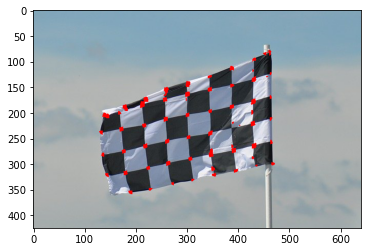

In [3]:
img = imread('flag.jpg')
gray = color.rgb2gray(img)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,8,3,0.04)
img[dst>0.09*dst.max()]=[255,0,0]
plt.imshow(img)

## Detektor krawędzi Canny

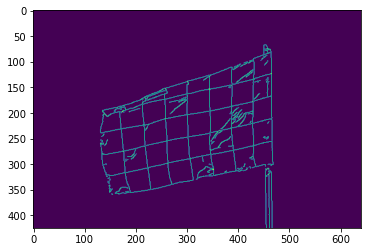

In [4]:
img = cv2.imread("flag.jpg")
edges = cv2.Canny(img,200,300,True)
plt.imshow(edges)

## HOG (Histogram of oriented gradients)

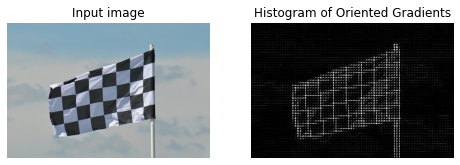

In [5]:
image = imread("flag.jpg")

fd, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True, multichannel=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

## GLCM

Dissimilarity [[20.71358155]] 
Correlation [[0.05977143]] 
Homogeneity [[0.27704954]] 
Energy [[0.06688967]] 
Contrast [[1279.83766289]]


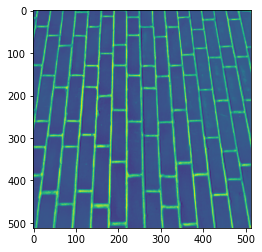

In [6]:
img=skimage.data.brick()
plt.imshow(img)
img=np.uint8(img*255)

glcm = skimage.feature.greycomatrix(img, distances=[6], angles=[0],levels=256, normed=True)
dissimilarity=skimage.feature.greycoprops(P=glcm, prop='dissimilarity')
correlation=skimage.feature.greycoprops(P=glcm, prop='correlation')
homogeneity=skimage.feature.greycoprops(P=glcm, prop='homogeneity')
energy=skimage.feature.greycoprops(P=glcm, prop='energy')
contrast=skimage.feature.greycoprops(P=glcm, prop='contrast')

glcm_props=[dissimilarity, correlation, homogeneity, energy,contrast]
print('Dissimilarity', dissimilarity, '\nCorrelation', correlation, '\nHomogeneity', homogeneity,
      '\nEnergy', energy, '\nContrast', contrast)

## Miary podobieństwa wektorów

W celu pomiaru podobieństwa dwóch wektorów można pomierzyć ich odległości używając np. odległość euklidesowej lub manhattan. 
Poniżej przedstawiono wyniki pomiarów dla 3 wektorów: w1 i w2 - podobnych do siebie, oraz w3 - innego niż pozostałe.

In [7]:
w1=[9,5,4,-5] 
w2=[7,6,3,-1]
w3=[1,20,40,10]
#porownanie w1 i w2
d_euklidean = sqrt(sum(pow(a-b,2) for a, b in zip(w1, w2))) #odl. euklidesowa
print('w1 vs. w2', '\nodleglosc euklidesowa', d_euklidean)
d_manhattan = sum(abs(a-b) for a,b in zip(w1,w2)) #odl. manhattan
print('odleglosc manhattan',d_manhattan)

#porownanie w1 i w3
d_euklidean2 = sqrt(sum(pow(a-b,2) for a, b in zip(w1, w3)))
print('\nw1 vs. w3', '\nodleglosc euklidesowa',d_euklidean2)
d_manhattan2 = sum(abs(a-b) for a,b in zip(w1,w3))
print('odleglosc manhattan',d_manhattan2)

w1 vs. w2 
odleglosc euklidesowa 4.69041575982343
odleglosc manhattan 8

w1 vs. w3 
odleglosc euklidesowa 42.5440947723653
odleglosc manhattan 74


# Zadanie 1.
## Color Layout Descriptor

In [8]:
# reshape image na wymiar 64x64x3
dim = (64,64)
image_resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
print("Original image shape: {}, transformed image shape {}".format(image.shape, image_resized.shape))
block_size = (8,8)

# podział na 64 bloki 8 x 8
# ! Przeniesione do funkcji split to blocks
# blocks = [image_resized[x : x + block_size[0], y : y + block_size[1]] for x in range(0, dim[0], block_size[0]) for y in range(0, dim[1], block_size[1])]
# blocks = np.array(blocks)
# print("Blocks shape: {}".format(blocks.shape))

Original image shape: (425, 640, 3), transformed image shape (64, 64, 3)


In [9]:
def split_to_blocks(img, block_size = (8,8), dim = (64,64)):
    blocks = [img[x : x + block_size[0], y : y + block_size[1]] for x in range(0, dim[0], block_size[0]) for y in range(0, dim[1], block_size[1])]
    return np.array(blocks)

In [10]:
# resize image
dim = (64,64)
block_size = (8,8)

image_resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
print("Original image shape: {}, transformed image shape {}".format(image.shape, image_resized.shape))



Original image shape: (425, 640, 3), transformed image shape (64, 64, 3)


In [11]:
# reprresentive color detection
def calculate_avarage_color(img):
    x_size = 8
    y_size = 8
    block_size = 8

    r_avarage = 0
    b_avarage = 0 
    g_avarage = 0

    row = 0

    avarage_color = np.zeros((64,64,3))

    blocks = split_to_blocks(img)

    for i,block in enumerate(blocks):

        r_total = 0
        g_total = 0
        b_total = 0

        r,g,b = block[:,:,0], block[:,:,1], block[:,:,2]
        for x in range(0, x_size):
            for y in range(0, y_size):
                r_total += r[x,y]
                g_total += g[x,y]
                b_total += b[x,y]

        r_avarage = r_total / (x_size * y_size)
        g_avarage = g_total / (x_size * y_size)
        b_avarage = b_total / (x_size * y_size)

        # przeskok o rząd
        if(i % 8 == 0 and i != 0):
            row += 1

        avarage_color[int(i%8 * block_size) :int((i%8 + 1) * block_size) , int(row * block_size) : int((row + 1) * block_size) , 0] = int(r_avarage)
        avarage_color[int(i%8 * block_size) :int((i%8 + 1) * block_size) , int(row * block_size) : int((row + 1) * block_size) , 1] = int(g_avarage)
        avarage_color[int(i%8 * block_size) :int((i%8 + 1) * block_size) , int(row * block_size) : int((row + 1) * block_size) , 2] = int(b_avarage)


    # without casting ti uin8 plt.imshow does not work
    # it hast to be uint8, cause opencv uses this format
    return np.array(avarage_color, np.uint8)
    

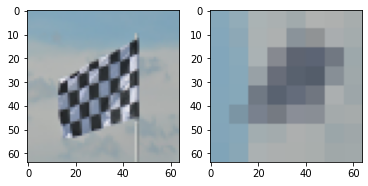

In [12]:
image_avg_color = calculate_avarage_color(image_resized)
# image_avg_color.shape
# image_avg_color.shape
f, axarr = plt.subplots(1,2) 
axarr[0].imshow(image_resized)
axarr[1].imshow(image_avg_color)

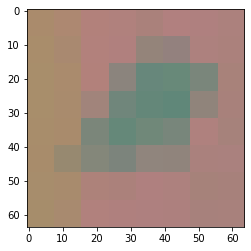

In [13]:
# Convert to YCbCr
image_ycbcr = cv2.cvtColor(image_avg_color, cv2.COLOR_BGR2YCR_CB)
plt.imshow(image_ycbcr)

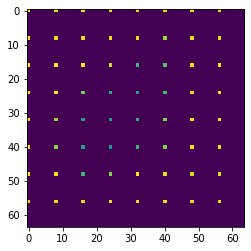

In [14]:
# calculate dct from YCbCr -> whole picture?
def calc_dct(img):

    x_size = 64
    y_size = 64
    block_size = 8
    row = 0 
    dct_map = np.zeros((x_size,y_size,3))
    
    blocks = split_to_blocks(img)

    for i, block in enumerate(blocks):

        y, cb, cr = block[:,:, 0], block[:,:,1], block[:,:,2]
        y_dct = cv2.dct(np.float32(y))
        cb_dct = cv2.dct(np.float32(cb))
        cr_dct = cv2.dct(np.float32(cr))

        if(i % 8 == 0 and i != 0):
            row += 1

        # DEBUG
        # print(i)
        # print(dct_map[int(i%8 * block_size) :int((i%8 + 1) * block_size) , int(row * block_size) : int((row + 1) * block_size) , 0].shape)
        # print("kolumny: {} : {}, \t wiersze: {} : {} \n". format(int(i%8 * block_size), int((i%8 + 1) * block_size), int(row * block_size), int((row + 1) * block_size)))

        dct_map[int(i%8 * block_size) :int((i%8 + 1) * block_size) , int(row * block_size) : int((row + 1) * block_size) , 0] = y_dct
        dct_map[int(i%8 * block_size) :int((i%8 + 1) * block_size) , int(row * block_size) : int((row + 1) * block_size) , 1] = cb_dct
        dct_map[int(i%8 * block_size) :int((i%8 + 1) * block_size) , int(row * block_size) : int((row + 1) * block_size) , 2] = cr_dct

    
    return dct_map


dct = calc_dct(image_ycbcr)
# Testowy print składowej y dla transformaty cosinusowej

plt.imshow(dct[:,:,0])


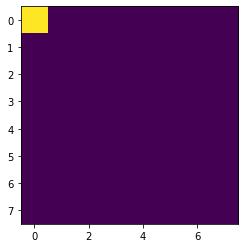

In [15]:
# Debug Cells
# for each block there is only 1 coefficient, the rest is zero, cause the color function is constant
# it can be checked by ploting block by block

# plt.imshow(dct[32:40,32:40,:])
plt.imshow(dct[48:56, 32:40,:1])


 Quantization by ZIGZAG algorithm for each 8 x 8 block <br/>
 DCT(y) -> 1 coefficients <br/>
 DCT(cb) -> 1 coefficients <br/>
 DCT(cr) -> 1 coefficients <br/>
 each block gives 3 coefficients <br/>
 for the whole image there is 192 coefficints. <br/>
 CLD = [y_dct1, y_dct2..., cb_dct2, cb_dct2...., cr_dct1, cr_dct2....]<br/><br/>
 For each block find non zero coefficient and save it to table, then merge

In [16]:
def find_coeff(dct):

    index = (0,0)
    dim = (64,64)
    block_size = (8,8)
    blocks_coeff = [dct[x : x + block_size[0], y : y + block_size[1]] for x in range(0, dim[0], block_size[0]) for y in range(0, dim[1], block_size[1])]
    blocks_coeff = np.array(blocks_coeff)
    y_dct = []
    cb_dct = []
    cr_dct = []

    for block in blocks_coeff:
        
        # take non zero or just (0,0) element of each block
        y,cb,cr = block[:,:,0], block[:,:,1], block[:,:,2]
        
        # Tak też można ale to nie elegancko
        # y_dct.append( y [ y != 0 ])
        # cb_dct.append( cb [ cb != 0 ])
        # cr_dct.append( cr [ cr != 0 ])

        y_dct.append( y [index[0], index[1]])
        cb_dct.append( cb [index[0], index[1]])
        cr_dct.append( cr [index[0], index[1]])
        

    y_dct = np.array(y_dct).reshape(1,-1).flatten().astype(np.int32)
    cb_dct = np.array(cb_dct).reshape(1,-1).flatten().astype(np.int32)
    cr_dct = np.array(cr_dct).reshape(1,-1).flatten().astype(np.int32)

    return y_dct, cb_dct, cr_dct

y_dct, cb_dct, cr_dct = find_coeff(dct)

CLD = np.concatenate((y_dct, cb_dct, cr_dct), axis = 0)
print("CLD coefficient shape: {}".format(CLD.shape))

CLD coefficient shape: (192,)


# Sumaryczny algorytm który zwraca współczynnii CLD -> w funkcji, wektor o długości 192 

In [17]:
def cld_vector(img, dim = (64,64), block_size = (8,8)):

    # Resize image to 64 x 64
    image_resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

    # Calculate avarage color and return 64 x 64 image with avarage color of each 8 x 8 block
    image_avg_color = calculate_avarage_color(image_resized)

    # Convert to YCbCr
    image_ycbcr = cv2.cvtColor(image_avg_color, cv2.COLOR_BGR2YCR_CB)

    # Calculate Discret Cosine Transform for each 8 x 8 block
    dct = calc_dct(image_ycbcr)

    # Find coeff for each channel
    y_dct, cb_dct, cr_dct = find_coeff(dct)

    # return CLD vector
    return np.concatenate((y_dct, cb_dct, cr_dct), axis = 0)
    


## Porównanie obrazów

### Przechodzę po wszystkich plikach z folderu `pic_to_search` żeby porównać z obrazem orginalnym, szukam najbardziej podobnego, dla którego metryka `d_manhattan` jest najmniejsza

In [18]:
import os

DIR = "pic_to_search"

image = imread('flag.jpg')
original_cld_vector = cld_vector(image)

results = {
    "name" : [],
    "img" : [],
    "d_euclides" : [],
    "d_manhattan" : []
}
for subdir, dirs, files in os.walk(DIR):
    for file in files:
        
        filepath = subdir + os.sep + file
        image_to_compare = imread(filepath)
        compare_cld_vector = cld_vector(image_to_compare)

        # Metric
        d_euklidean = sqrt(sum(pow(a-b,2) for a, b in zip(original_cld_vector, compare_cld_vector))) #odl. euklidesowa
        d_manhattan = sum(abs(a-b) for a,b in zip(original_cld_vector,compare_cld_vector)) #odl. manhattan
        results["name"].append(filepath)
        results["img"].append(image_to_compare)
        results["d_euclides"].append(d_euklidean)
        results["d_manhattan"].append(d_manhattan)


### Wypisanie obrazu o najbardziej podobnego na podstawie color layout descriptora

Text(0.5, 1.0, 'The most similar image')

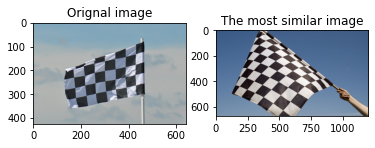

In [19]:
index_the_most_similar = list(results['d_manhattan']).index(min(results['d_manhattan']))

f, axarr = plt.subplots(1,2) 
axarr[0].imshow(image)
axarr[0].set_title("Orignal image")
axarr[1].imshow(results['img'][index_the_most_similar])
axarr[1].set_title("The most similar image")

# Zadanie 2

In [33]:
import pathlib
import tensorflow as tf
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url,
                                   fname='flower_photos',
                                   untar=True)
data_dir = pathlib.Path(data_dir)

X = []
Y = []


species = {0:'daisy',1:'dandelion',2:'roses',3:'sunflowers',4:'tulips'}
for s in range(0,5):
    flowers = list(data_dir.glob(species[s] +'/*'))
    for i in range(50):        
        X.append(cv2.cvtColor(cv2.imread(str(flowers[i])), cv2.COLOR_BGR2RGB))
        Y.append(s)


## Pokazanie wybranych obrazków

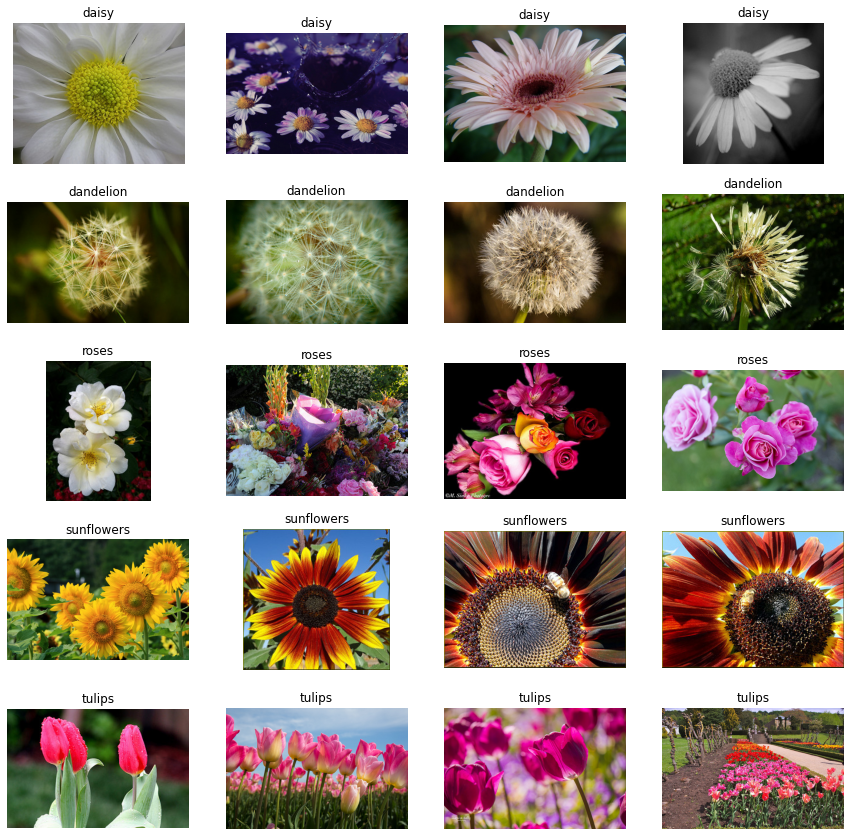

In [34]:
f, axarr = plt.subplots(5,4,figsize=(15,15))
for i in range(0,5):
    for j in range(0,4):
        axarr[i,j].imshow(X[i*50+j*3])
        axarr[i,j].axis('off')
        axarr[i,j].set_title(species[Y[i*50+j*3]])

## Propozycja wektora cech:
1. Color Layout Descriptor ->      192 cechy
2. Średnia i mediana z Histogram of Oriented Gradient   ->      2 cechy 
3. Histogram HSV (16 binów) dla każdego kanału          ->      48 cech    

In [73]:
from skimage.feature import hog
from statistics import median, mean
def feature_vetor(img):

    features = []

    # CLD
    cld = cld_vector(img)
    for x in cld:
        features.append(x)

    # hog
    f_hog = hog(img, orientations=9, pixels_per_cell=(16, 16), cells_per_block=(1, 1))
    features.append(median(f_hog))
    features.append(mean(f_hog))

    # HSV
    hsv_image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    histH, _ = np.histogram(hsv_image[:,:,0], bins=16, range=(0,255)) 
    histS, _ = np.histogram(hsv_image[:,:,1], bins=16, range=(0,255))  
    histV, _ = np.histogram(hsv_image[:,:,2], bins=16, range=(0,255))
    
    histH = histH.tolist()
    histS = histS.tolist()
    histV = histV.tolist()

    for b in range(0, 16):
        features.append(histH[b])
        features.append(histS[b])
        features.append(histV[b])
            
    return np.array(features)


## Obliczenie cech dla każdego obrazu

In [74]:
Y_features = ["Śr(HOG) :    ", "Med HOG :   "]
for b in range(0, 16):
    Y_features.append("Histogram - H -" + str(b) + " - :    ")
    Y_features.append("Histogram - S -" + str(b) + " - :    ")
    Y_features.append("Histogram - V -" + str(b) + " - :    ")
for c in range (0,192):
    Y_features.append("CLD -" + str(c) + " - :  ")

X_features = []
for image_to_calc in X:
    X_features.append(feature_vetor(image_to_calc))


In [75]:
Y_features

['Śr(HOG) :    ',
 'Med HOG :   ',
 'Histogram - H -0 - :    ',
 'Histogram - S -0 - :    ',
 'Histogram - V -0 - :    ',
 'Histogram - H -1 - :    ',
 'Histogram - S -1 - :    ',
 'Histogram - V -1 - :    ',
 'Histogram - H -2 - :    ',
 'Histogram - S -2 - :    ',
 'Histogram - V -2 - :    ',
 'Histogram - H -3 - :    ',
 'Histogram - S -3 - :    ',
 'Histogram - V -3 - :    ',
 'Histogram - H -4 - :    ',
 'Histogram - S -4 - :    ',
 'Histogram - V -4 - :    ',
 'Histogram - H -5 - :    ',
 'Histogram - S -5 - :    ',
 'Histogram - V -5 - :    ',
 'Histogram - H -6 - :    ',
 'Histogram - S -6 - :    ',
 'Histogram - V -6 - :    ',
 'Histogram - H -7 - :    ',
 'Histogram - S -7 - :    ',
 'Histogram - V -7 - :    ',
 'Histogram - H -8 - :    ',
 'Histogram - S -8 - :    ',
 'Histogram - V -8 - :    ',
 'Histogram - H -9 - :    ',
 'Histogram - S -9 - :    ',
 'Histogram - V -9 - :    ',
 'Histogram - H -10 - :    ',
 'Histogram - S -10 - :    ',
 'Histogram - V -10 - :    ',
 'His

Sumarycznie każdy obraz ma 242 cechy
## Wydobycie najlepszych/ najbardziej istotnych cech

In [76]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, mutual_info_classif

mi_selector = SelectKBest(mutual_info_classif, k='all')
mi_fit = mi_selector.fit(X_features, Y)
dfscores_mi = pd.DataFrame(mi_fit.scores_)
dfcolumns_mi = pd.DataFrame(Y_features)
featureScores_mi = pd.concat([dfcolumns_mi,dfscores_mi],axis=1)
featureScores_mi.columns = ['Feature','Importance'] 

featureScores_mi.nlargest(53,'Importance').style.hide_index()
important_features = list(featureScores_mi.nlargest(15,'Importance').index.values)

Wypisanie wszystkich współczynników

In [77]:
featureScores_mi

Feature  Importance
0               Śr(HOG) :        0.018792
1                Med HOG :       0.089486
2    Histogram - H -0 - :        0.029829
3    Histogram - S -0 - :        0.059718
4    Histogram - V -0 - :        0.000000
..                        ...         ...
237            CLD -187 - :      0.132507
238            CLD -188 - :      0.082174
239            CLD -189 - :      0.022289
240            CLD -190 - :      0.061588
241            CLD -191 - :      0.015189

[242 rows x 2 columns]

15 najważniejszych współczynników

In [78]:
X_important_features = []

for original_image in X:
    X_important_features.append([feature_vetor(original_image)[i] for i in important_features])

In [84]:
def similar_images(important_features, imageIndex):
    similarImages = []
    
    for i in range(0, len(important_features)):
        if(i==imageIndex):
            continue
        similarImages.append((sqrt(sum(pow(a-b,2) for a, b in zip(important_features[imageIndex], important_features[i]))), i))
    
    similarImages.sort()
    
    return similarImages[0:3]    

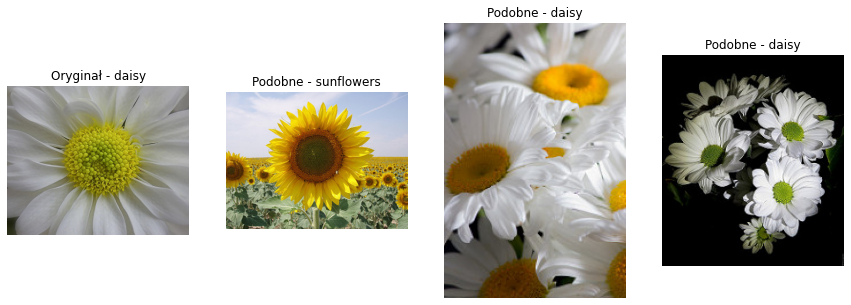

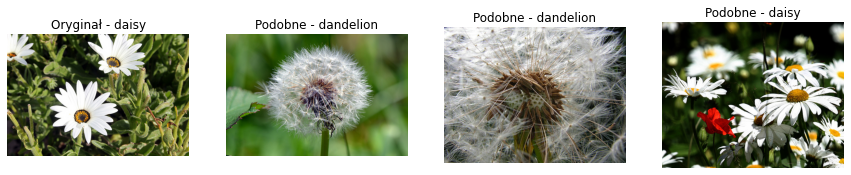

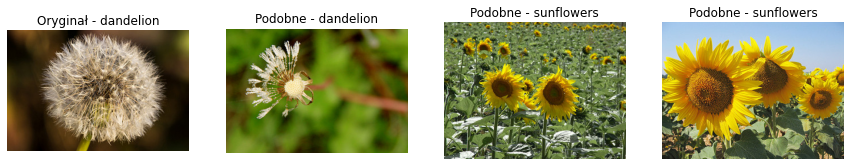

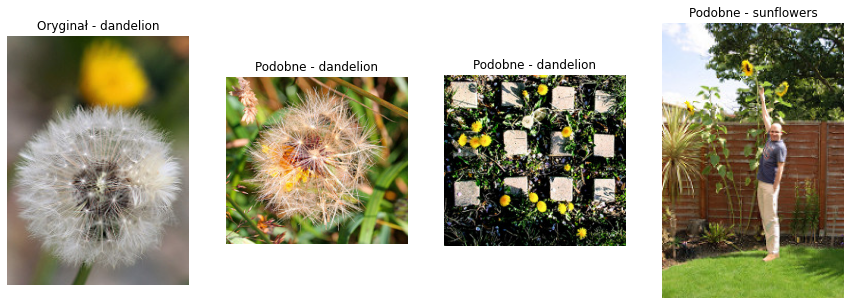

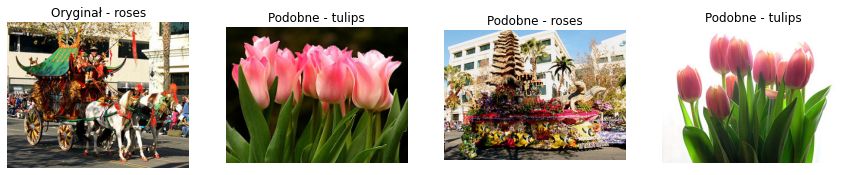

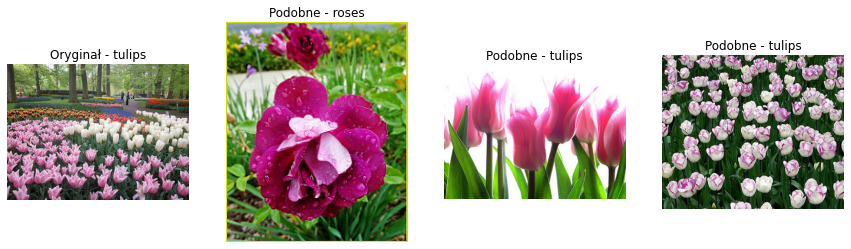

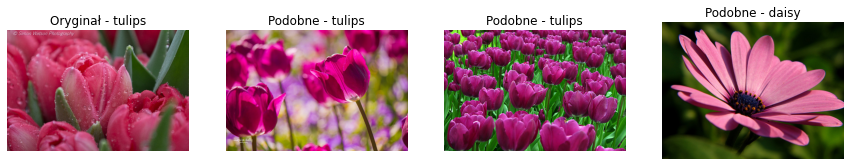

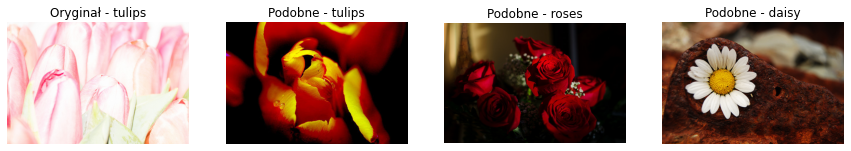

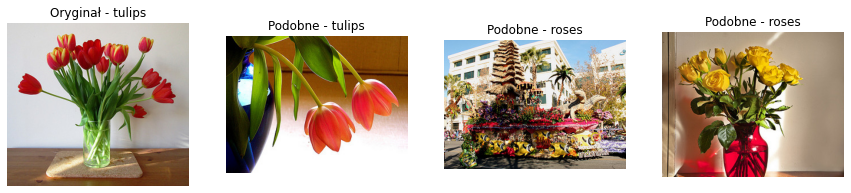

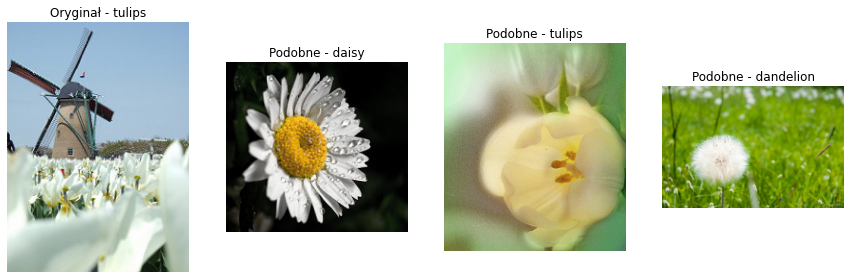

In [85]:
for image_number in [0,12,56,77,120,230,234,236,240,247]:
    
    Sim = similar_images(X_important_features, image_number)
    
    f, axarr = plt.subplots(1,4,figsize=(15,15))
    axarr[0].imshow(X[image_number])
    axarr[0].axis('off')
    axarr[0].set_title("Oryginał - " + species[Y[image_number]])
    for j in range(1,4):
        axarr[j].imshow(X[Sim[j-1][1]])
        axarr[j].axis('off')
        axarr[j].set_title("Podobne - " + species[Y[Sim[j-1][1]]])

# WNIOSKI
## Wybrany wektor cech po zredukowaniu okazju się dosyć trafny. Zaproponowany algorytm dosyć trafnie wyszukuje zadane zdjęcie na podstawie cech zdjęcia
## Nie jest to rozwiązanie wolne od błędów gdyż można zauważyć że proponowany klasyfikator jest bardzo czuły na kolor, jeżeli na zdjęciu są podobne kolory, to pomimo różnych gatunków kwiatów zdjęcia są klasyfikowane jako podobne. Jednakże nie jest to błąd sam w sobie. Proponowany algorytm nie miał klasyfikować podobnych gatunków, tylko wyszukiwać podobne zdjęcia na podstawie zadanego uwzględniając wektory cech tego obrazu